In [ ]:
!pip install torch-geometric
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.13.1+cu116.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773302 sha256=45fca9d1021ec60eda19b9cef9ba47e7dd1c0db6cd83bca04b005d835c198b4a
  Stored in directory: /root/.cache/pip/wheels/31/b2/8c/9b4bb72a4384eabd1ffeab2b7ead692c9165e35711f8a9dc72
Successfully built torch-geometric
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 43.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 

In [ ]:
import pandas as pd
import torch
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
print(torch.__version__)
import torch_geometric
print(torch_geometric.__version__)

1.13.1+cu116
2.2.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/elliptic_bitcoin_dataset/

elliptic_txs_classes.csv  elliptic_txs_edgelist.csv  elliptic_txs_features.csv


In [ ]:
classes =  pd.read_csv("drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
edgelist = pd.read_csv("drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
features = pd.read_csv("drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)

features


,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,173077460,49,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203765,158577750,49,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,...,0.162722,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
203766,158375402,49,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,...,1.261246,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203767,158654197,49,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,...,-0.397749,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399


In [ ]:

Dir = nx.from_pandas_edgelist(edgelist, source='txId1', target='txId2', create_using=nx.DiGraph())
print(nx.is_directed(Dir))
G = Dir.to_undirected(reciprocal=False, as_view=False)
print(nx.is_directed(G))
nx.number_connected_components(G)

nx.set_node_attributes(G, classes.set_index("txId").to_dict("index"))
keys = features.values[:,0]
rows = torch.Tensor(features.values[:, 1:])
dick = dict(zip(keys, rows))
print(keys)
nx.set_node_attributes(G, dick, "x")
print(G.nodes[230460314])


True
False
[2.30425980e+08 5.53045800e+06 2.32022460e+08 ... 1.58375402e+08
 1.58654197e+08 1.57597225e+08]
{'class': 'unknown', 'x': tensor([ 1.0000e+00,  1.0115e+00, -8.1127e-02, -1.2014e+00,  1.1537e+00,
         3.3328e-01,  1.3127e+00, -6.1584e-02, -1.6352e-01,  4.1399e-02,
         9.3589e-01, -9.8695e-02,  1.2030e+00,  9.8890e-01,  3.4169e-01,
        -1.3282e-02, -5.7392e-02,  5.8329e-02, -3.2930e-02, -4.2709e-02,
         6.5455e-02,  3.2495e-01, -1.3973e-01, -1.4885e-01, -8.0105e-02,
        -1.5564e-01,  1.3131e+00,  1.1070e+00, -1.3973e-01, -1.4885e-01,
        -8.0104e-02, -1.5564e-01,  1.3131e+00,  1.1070e+00, -2.4669e-02,
        -3.1272e-02, -2.3045e-02, -2.6215e-02,  1.4278e-03,  1.4826e-03,
        -2.2722e-01, -2.3936e-01, -7.5242e-02, -2.3495e-01, -8.6606e-01,
        -8.5603e-01, -2.2720e-01, -2.4323e-01, -9.7872e-02, -2.3590e-01,
        -8.7103e-01, -8.6108e-01, -4.1403e-01, -4.8728e-01, -2.3122e-01,
        -4.6727e-01,  5.5703e-01,  7.4598e-01, -3.9151e-02, -1.

In [ ]:
A = sorted(nx.connected_components(G), key=len)
S = []
attClass = nx.get_node_attributes(G, "class")
attAttributes = nx.get_node_attributes(G, "x")

for sub in nx.connected_components(G):
  s = Dir.subgraph(sub).copy()
  S.append(s)
  attrClass = dict((k, attClass[k]) for k in s.nodes)
  attrAttributes = dict((k, attAttributes[k]) for k in s.nodes)

  nx.set_node_attributes(s, attrClass, "class")
  nx.set_node_attributes(s, attrAttributes, "x")









In [ ]:
kl = np.array([len(s.nodes) for s in S])
print(kl)
ind = np.argmin(kl)
print(kl[ind])


[7880 4544 6621 5693 6803 4328 6048 4457 4996 6727 4296 2047 4528 2022
 3639 2975 3385 1976 3506 4291 3537 5894 4165 4592 2314 2523 1089 1653
 4275 2483 2816 4525 3151 2486 5507 6393 3306 2891 2760 4481 5342 7140
 5063 4975 5598 3519 5121 2954 2454]
1089


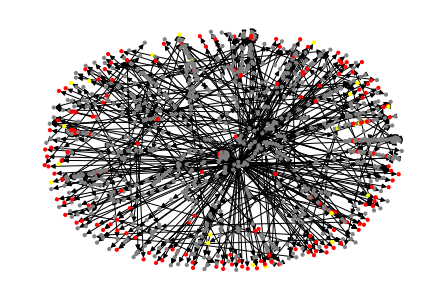

In [ ]:
color_map = {"unknown": "grey", "1": "yellow", "2": "red"}
colors = [color_map[G.nodes[node]["class"]] for node in S[ind].nodes]
nx.draw(S[ind], node_color=colors, node_size=10)

In [ ]:
tGraphs = [torch_geometric.utils.from_networkx(s) for s in S]
loader = torch_geometric.loader.DataLoader(tGraphs, batch_size=10)

for data in loader:
  print(data.x)

tensor([[ 1.0000, -0.1647, -0.1847,  ..., -0.1406,  1.5197,  1.5214],
        [ 1.0000, -0.1647, -0.1847,  ..., -0.1406,  1.5197,  1.5214],
        [ 1.0000, -0.1648, -0.1847,  ..., -0.1406,  1.5197,  1.5214],
        ...,
        [10.0000, -0.1654, -0.1847,  ..., -0.1406, -1.7609, -1.7610],
        [10.0000,  0.7182, -0.1738,  ..., -0.0584, -0.2202, -0.2185],
        [10.0000, -0.1216, -0.0811,  ..., -0.0975, -0.1206, -0.1198]])
tensor([[ 1.1000e+01, -3.0666e-02, -1.5465e-03,  ..., -9.7524e-02,
         -1.2061e-01, -1.1979e-01],
        [ 1.1000e+01, -1.5983e-01, -1.7716e-01,  ...,  1.6092e-01,
         -1.2061e-01, -1.1979e-01],
        [ 1.1000e+01, -1.7201e-01, -1.8467e-01,  ..., -1.4060e-01,
         -1.7609e+00, -1.7610e+00],
        ...,
        [ 2.0000e+01, -1.8719e-02, -1.0701e-01,  ..., -9.7524e-02,
         -1.2061e-01, -1.1979e-01],
        [ 2.0000e+01, -1.6776e-01, -1.8130e-01,  ..., -1.4060e-01,
          1.5197e+00,  1.5214e+00],
        [ 2.0000e+01, -8.9273e-02, -1.

In [ ]:
from torch_geometric.nn import GCNConv, GCN
import torch.nn as nn
import torch.nn.functional as F

class OurGCN(torch.nn.Module):
    def __init__(self, conv_model, in_channels, hidden_channels,out_channels, layers):
        super(MyGCN, self).__init__()
        self.convs = nn.ModuleList()
        self.convs.append(conv_model(in_channels, hidden_channels))
        
        for i in range(layers):
          self.convs.append(conv_model(hidden_channels, hidden_channels))
        self.convs.append(conv_model(hidden_channels, out_channels))
        
    def forward(self, x, edge_index):
        for i in range(len(convs)):
          x = self.conv1(x, edge_index)
          x = F.relu(x)
          x = F.dropout(x, training=self.training)
        return x


In [ ]:
in_dimension = len(features.values[0, 1:])
hidden_dim = 50
num_layers = 10
out_dim = 2

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = nn.Sequential(GCN(in_dimension, hidden_dim,  num_layers, out_dim, dropout=0.5, act="relu"))
criterion = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train loop
model.train()
for epoch in range(10):
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        print(out)
        break
        loss = criterion(out[batch.train_mask], batch.y[batch.train_mask])
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch.num_graphs
    avg_loss = total_loss / len(dataset)
    print(f"Epoch {epoch}, Loss: {avg_loss:.4f}")

TypeError: ignored

# Nov razdelek